In [1]:
#Packages
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

mkdir: cannot create directory ‘project1/results/all_snaps/gassphere/’: File exists


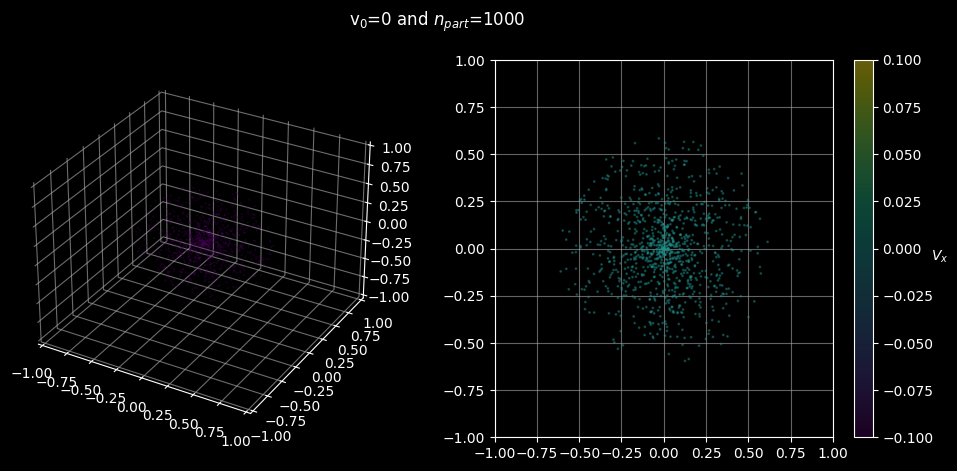

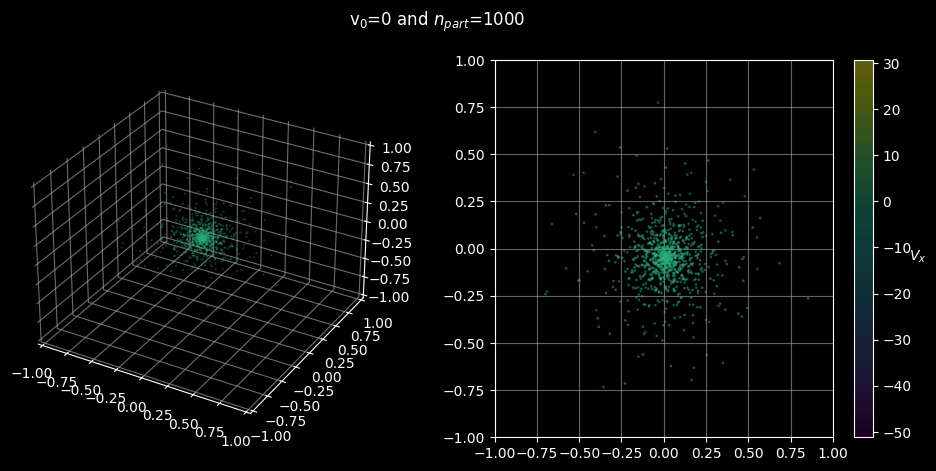

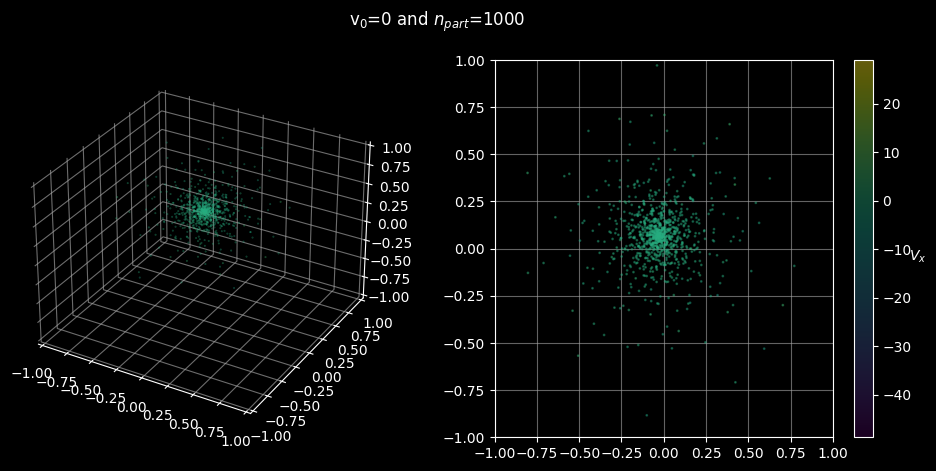

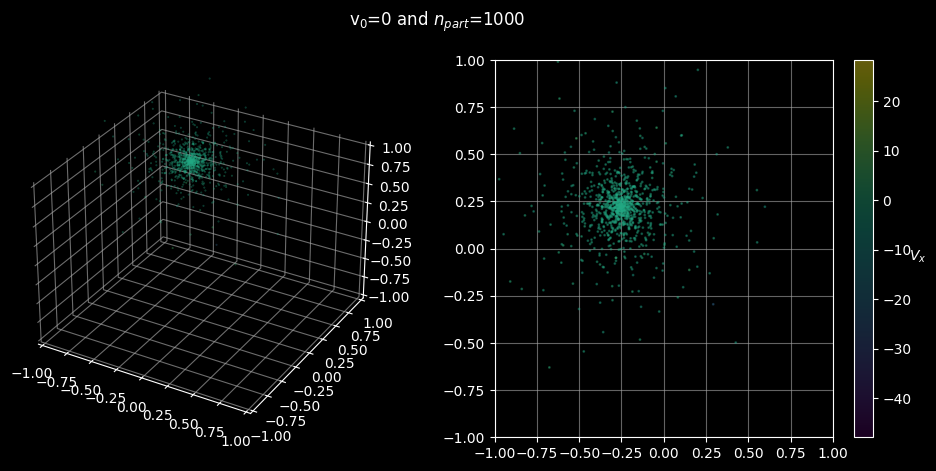

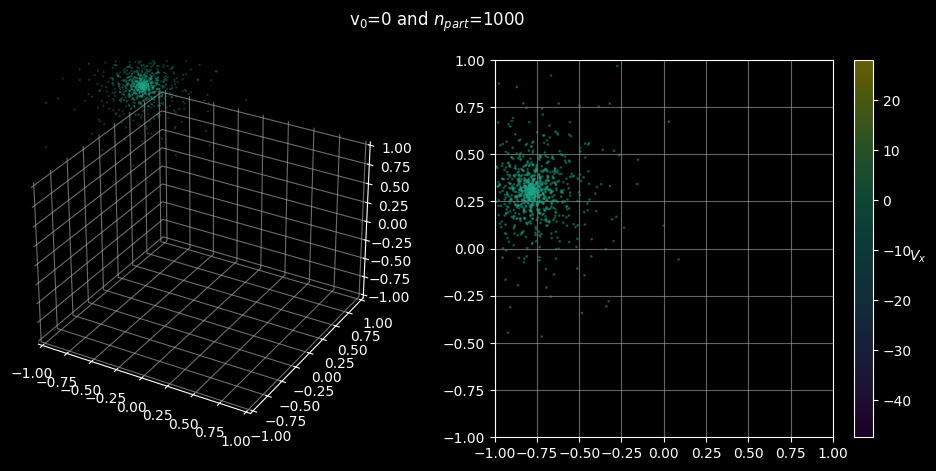

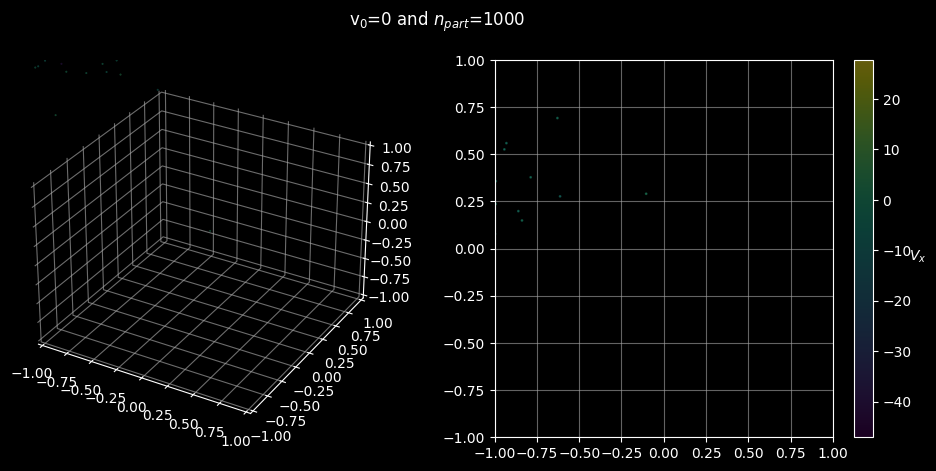

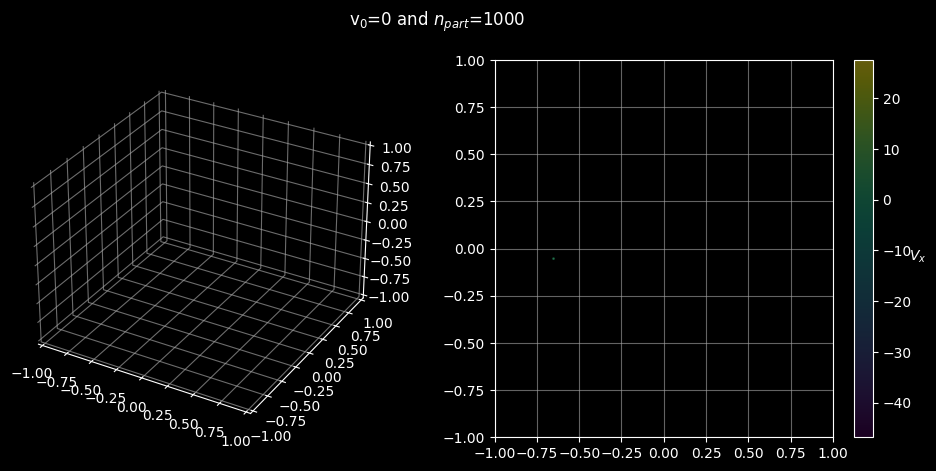

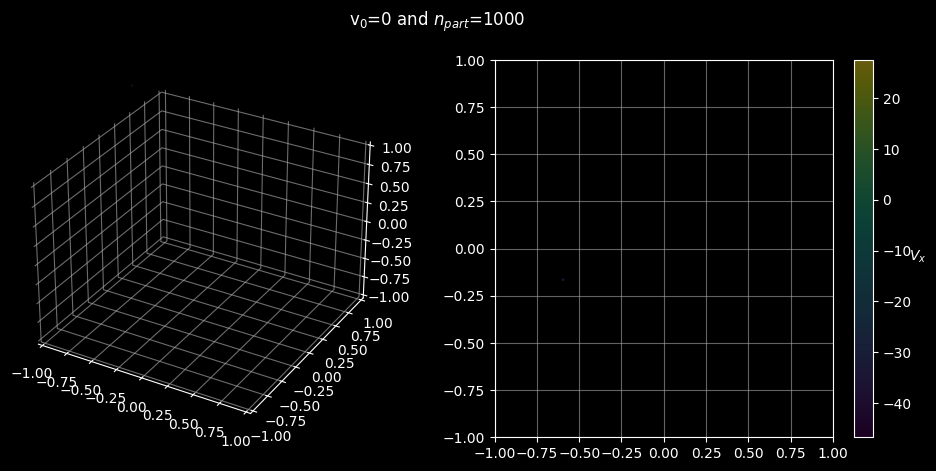

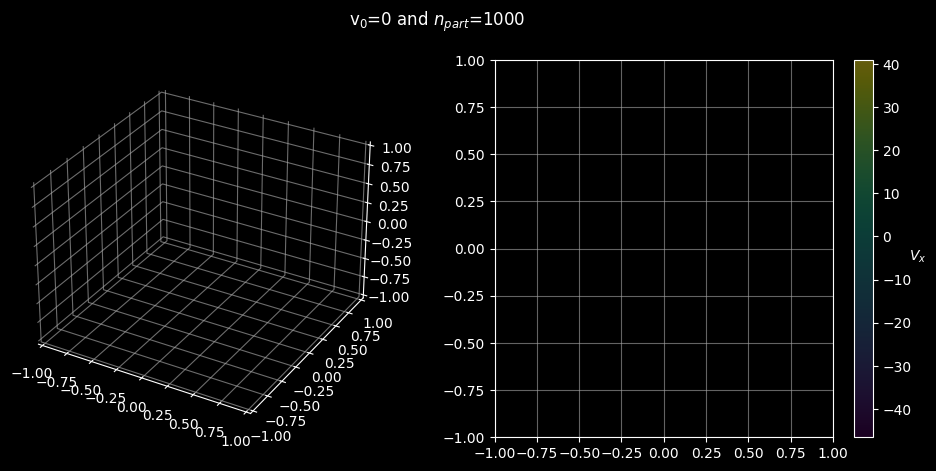

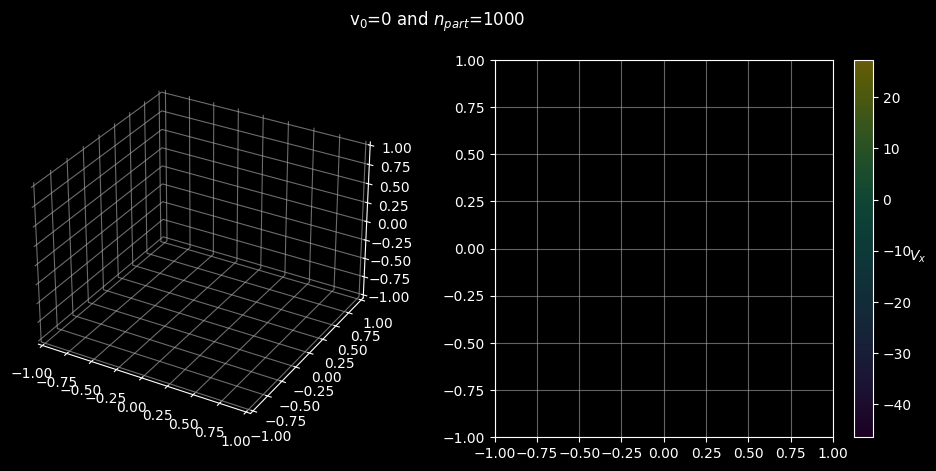

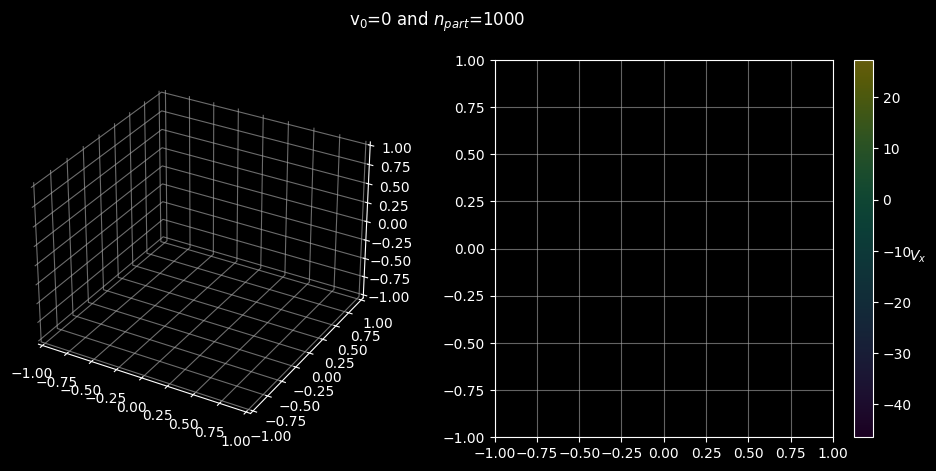

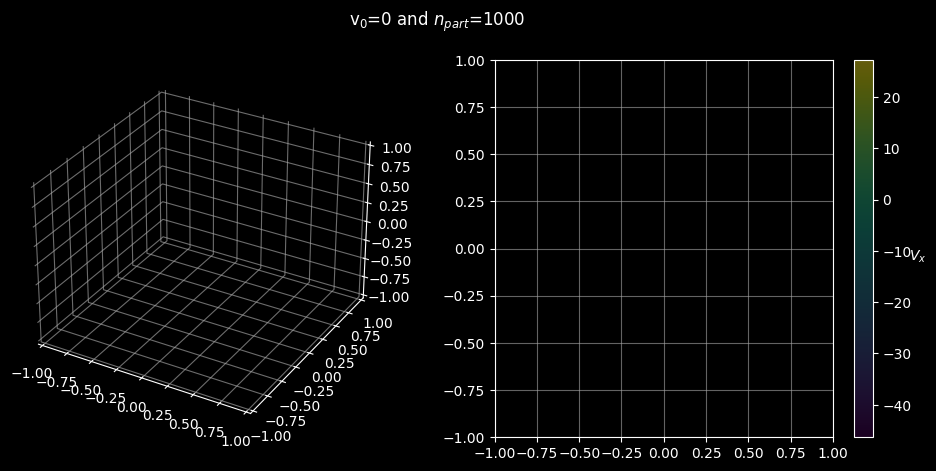

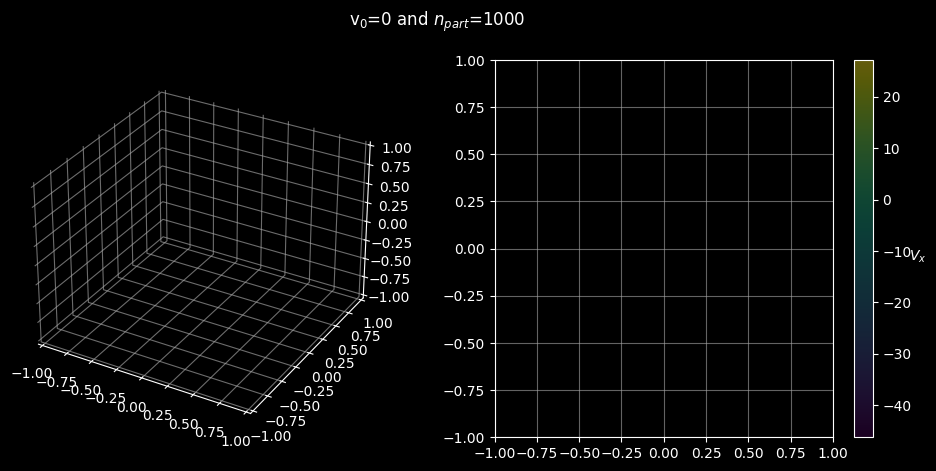

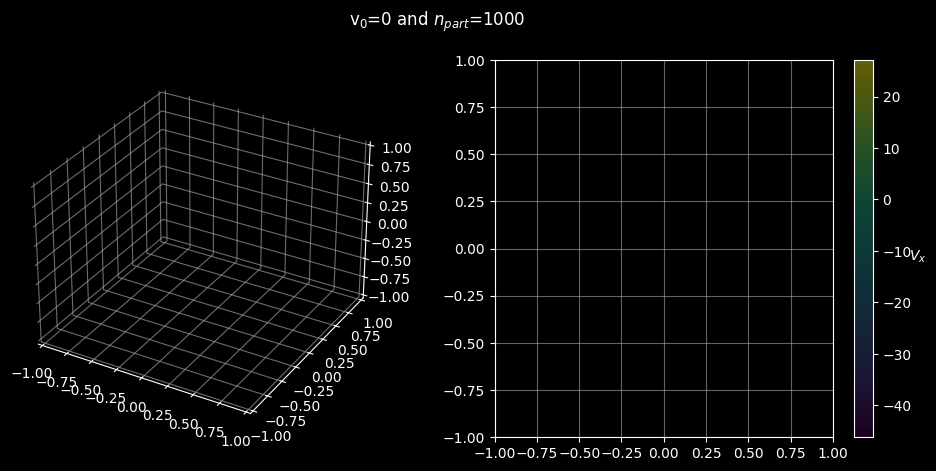

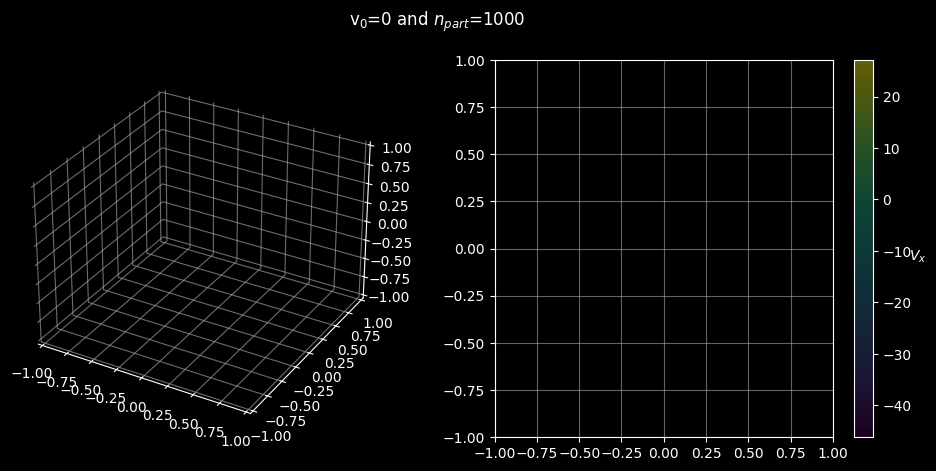

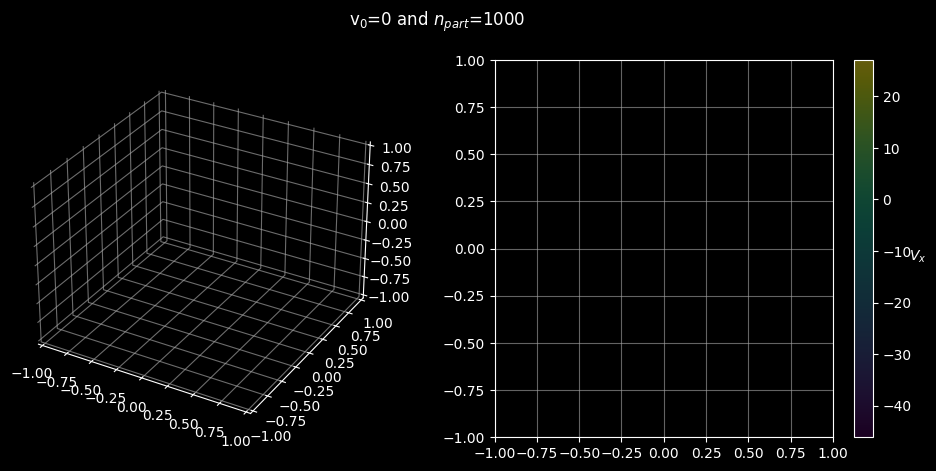

In [3]:
#Type of simulation:
npart = 1000
simtype ='gassphere'

#Plot style:
plt.style.use('dark_background')
title = 'v$_0$=0 and $n_{part}$='+str(npart)

#Directory with data:
dirr = "project1/data/"
datadir = dirr+simtype+'/' #PONÍA: datadir = dirr+'/'+simtype+'/'

#Creating folders for the output image.
rootdir = 'project1/results/'
savedir = rootdir+'all_snaps/'+simtype+'/'
!mkdir $savedir

files = os.listdir(datadir+".")
files.sort()
for i,file in enumerate(files):    #Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
    f = h5py.File(datadir+file, "r")
    group = f["PartType0"]
    data = group["Coordinates"][()]
    vel = group["Velocities"][()]
    
    #Plotting the initial conditions of both galaxies:
    fig = plt.figure(figsize=(12,5),dpi=100)
    fig.suptitle(title)
    plt.rcParams['grid.color'] = (0.65, 0.65, 0.65, 0.65)


    # 1st subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plot1 = ax.scatter3D(data[:,0],data[:,1],data[:,2],c=vel[:,0],cmap="viridis",s=0.2,alpha=0.4)
    ax.set_axisbelow(True)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

    # 2nd subplot
    ax = fig.add_subplot(1, 2, 2)
    ax.grid(alpha=0.6)
    plot = ax.scatter(data[:,0],data[:,1],s=1,c=vel[:,0],cmap="viridis",alpha=0.4)
    cbar = fig.colorbar(plot, ax = ax)
    cbar.set_label('$V_x$', rotation=0)
    ax.set_axisbelow(True)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    plt.savefig(savedir+str(i)+".png", bbox_inches = 'tight')
    plt.show()


In [18]:
#ANIMATION:
im1 = Image.open(savedir+'0.png')
images = []

for k in range(1, 20):
    path = savedir + str(k) + '.png'
    images.append(Image.open(path))

im1.save(rootdir+'gif/'+simtype+'.gif', save_all=True, append_images=images, duration=400, loop=2)